# Uniform vs. Non-uniform Data Generation

In [8]:
from numba import cuda
cuda.select_device(0)
cuda.close()

In [9]:
import os, sys
sys.path.append("../..")
from cryoem.plots import plot_detector_pixels
import ipyvolume as ipv
import h5py
import numpy as np
import matplotlib.pyplot as plt
from cryoem.plots import plot_detector_pixels
import ipyvolume as ipv
from cryoem.projections import generate_2D_projections
from cryoem.conversions import euler2quaternion
import seaborn as sns; sns.set(style="whitegrid", color_codes=True)

from cryoem.conversions import d_q, euler2quaternion


In [10]:
input_file_path = "../../data/5a1a.mrc"
ProjNber = 5000
AngCoverage = [2.0, 1.0, 0.5]
AngShift = [0, 0, 0]
output_file_name = "5a1a_uniform_ProjectionsAngles_ProjNber5000_AngCoverage2.0,1.0,0.5_AngShift0.0,0.0,0.0.h5"

generate_2D_projections(input_file_path=input_file_path, 
                        ProjNber=ProjNber,
                        AngCoverage=AngCoverage,
                        AngShift=AngShift,
                        angles_gen_mode="uniform_S2",
                        output_file_name=output_file_name)

* Generating the dataset *
(5000, 3)
Protein:         5a1a
Input filename:  ../../data/5a1a.mrc
Output filename: 5a1a_uniform_ProjectionsAngles_ProjNber5000_AngCoverage2.0,1.0,0.5_AngShift0.0,0.0,0.0.h5
Volume:          (110, 155, 199)
Projections (#): (5000, 275, 275)
Angles (#):      (5000, 3)

**********


In [5]:
with mrcfile.open(input_file_path) as mrcVol:
    reconstruction = np.array(mrcVol.data) 
    #mrcVol.print_header()

In [4]:
import mrcfile

In [6]:
# location of *.h5 files
#data_dir = "../../data/"

# half coverage (AngCoverage=0.5)
#projections_filename = "5j0n_uniform_ProjectionsAngles_ProjNber5000_AngCoverage2.0,1.0,2.0_AngShift0.0,0.0,0.0.h5"

# load structures
data = h5py.File(output_file_name, 'r')

print(f"{data['Projections'].shape[0]} projections of images with dimension {data['Projections'].shape[1:]} pixels")
print(f"{data['Angles'].shape[0]} sets of {data['Angles'].shape[1]} ground truth angles of corresponding projection images")

5000 projections of images with dimension (275, 275) pixels
5000 sets of 3 ground truth angles of corresponding projection images


In [7]:
np.array(data['Angles']).max(axis=0)

array([6.278518 , 3.099064 , 1.5706708], dtype=float32)

In [10]:
from cryoem.rotation_matrices import RotationMatrix
def plot_detector_pixels(angles, reconstruction, center=np.array([100, 155/2, 199/4])):
    
    
    # NOTE: used
    ipv.clear()

    arr = RotationMatrix(angles)

    ipv.figure(width=500, height=500)
    ipv.volshow(reconstruction, level=[0.1, 0.1], opacity=0.2,  data_min=reconstruction.min(), data_max=reconstruction.max())
    
    radius = np.max(reconstruction.shape)/1.5

    ipv.scatter(center[0]+arr[:, 0]*radius, 
                center[1]+arr[:, 1]*radius, 
                center[2]+arr[:, 2]*radius, 
                marker="sphere", color="blue", size=1)
    ipv.xlim(center[0]-radius, center[0]+radius)
    ipv.ylim(center[1]-radius, center[1]+radius)
    ipv.zlim(center[2]-radius, center[2]+radius)
    ipv.show()

In [9]:
plot_detector_pixels(data['Angles'], reconstruction)

[100.    77.5   49.75]
132.66666666666666
[100.         -14.99797471 -27.84306935 ...  35.97913464  88.79596702
  60.05282706]


/home/jelena/miniconda3/envs/protein_reconstruction/lib/python3.6/site-packages/ipyvolume/serialize.py:81: RuntimeWarning: invalid value encountered in true_divide
  gradient = gradient / np.sqrt(gradient[0]**2 + gradient[1]**2 + gradient[2]**2)


In [6]:
from cryoem.plots import plot_angles_count

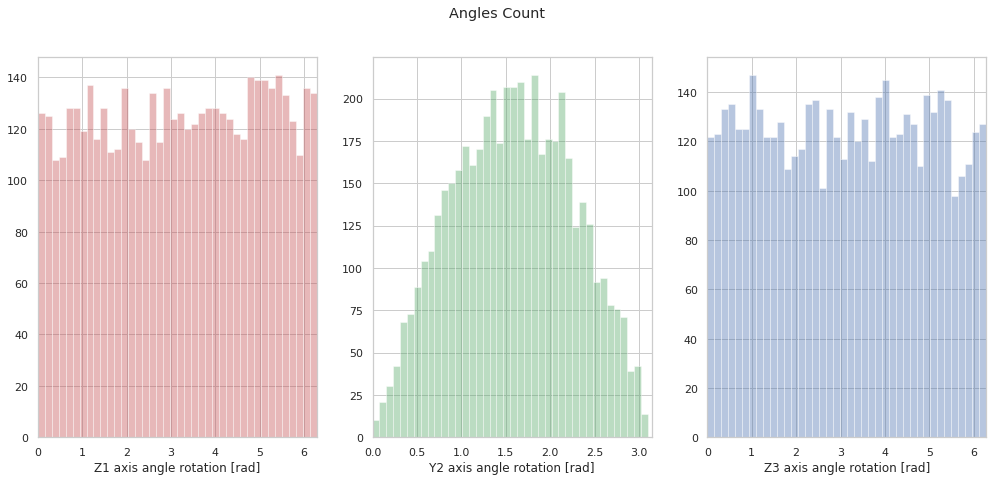

In [7]:
plot_angles_count(np.array(data['Angles']))

## (1) Uniform Quaternions Data Generation

In [4]:
PROTEIN = "5j0n"

In [3]:
input_file_path = "../../data/5j0n.mrc"
ProjNber = 5000
AngCoverage = [2.0, 1.0, 2.0]
AngShift = [0, 0, 0]
output_file_name = "5j0n_uniform_ProjectionsAngles_ProjNber5000_AngCoverage2.0,1.0,2.0_AngShift0.0,0.0,0.0.h5"

generate_2D_projections(input_file_path=input_file_path, 
                        ProjNber=ProjNber,
                        AngCoverage=AngCoverage,
                        AngShift=AngShift,
                        angles_gen_mode="uniform_S3",
                        output_file_name=output_file_name)

* Loading the dataset *
Protein:         5j0n
Input filename:  ../../data/5j0n.mrc
Output filename: 5j0n_uniform_ProjectionsAngles_ProjNber5000_AngCoverage2.0,1.0,2.0_AngShift0.0,0.0,0.0.h5
Projections (#): (5000, 116, 116)
Angles (#):      (5000, 3)

**********


In [6]:
# location of *.h5 files
data_dir = "../../data/"

# half coverage (AngCoverage=0.5)
projections_filename = "5j0n_uniform_ProjectionsAngles_ProjNber5000_AngCoverage2.0,1.0,2.0_AngShift0.0,0.0,0.0.h5"

# load structures
data = h5py.File(os.path.join(data_dir, projections_filename), 'r')

print(f"{data['Projections'].shape[0]} projections of images with dimension {data['Projections'].shape[1:]} pixels")
print(f"{data['Angles'].shape[0]} sets of {data['Angles'].shape[1]} ground truth angles of corresponding projection images")

5000 projections of images with dimension (116, 116) pixels
5000 sets of 3 ground truth angles of corresponding projection images


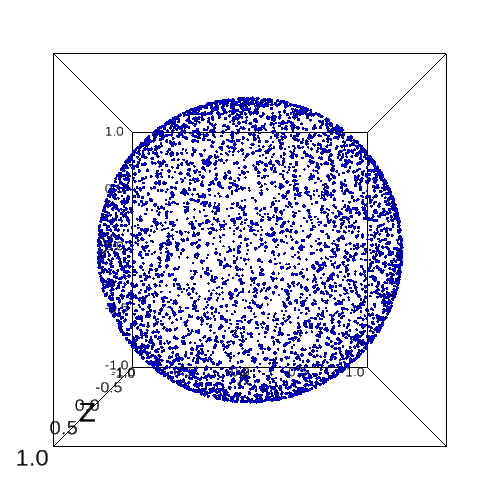

In [7]:
plot_detector_pixels(data['Angles'])

In [8]:
ipv.screenshot()

Output()

In [10]:
angles_true = data['Angles']
q_true = euler2quaternion(angles_true)

In [13]:
tick_size = 18
label_size = 22

In [14]:
np.array(angles_true)

array([[ 1.66872382,  1.54194188,  0.80028236],
       [ 3.0638721 ,  1.81334412,  0.05551527],
       [ 0.45431015,  1.50813544,  1.3069694 ],
       ...,
       [-0.89085835,  2.93270206, -2.94053864],
       [ 2.50511575,  1.90137124, -2.32977176],
       [ 1.00241017,  2.540236  ,  1.31619549]])

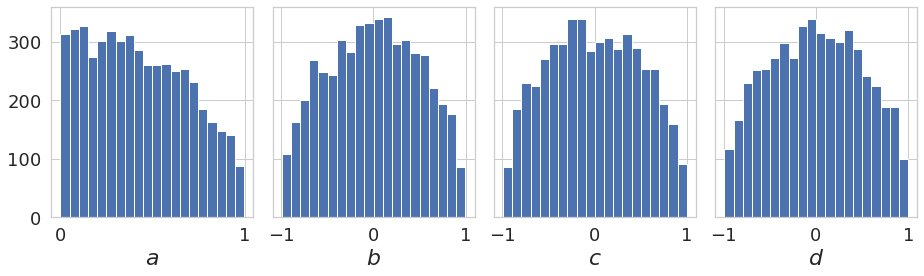

In [17]:
fig, axs = plt.subplots(1, 4, figsize=(13, 4), sharey=True)
#quaternion_color = "lightcoral"
#gs1 = gridspec.GridSpec(4, 13)
#gs1.update(wspace=0.025, hspace=0.05) 
#axs = list(map(lambda i: plt.subplot(gs1[i]), range(4)))
plt.axis('on')
#plt.title("Quaternion: $q = a + b\mathbf{i} + c\mathbf{j} + d\mathbf{k}$", loc='center', fontsize=label_size)

axs[0].hist(q_true[:,3], bins=20)
axs[0].set_xlabel("$a$", fontsize=label_size)
axs[1].hist(q_true[:,0], bins=20)
axs[1].set_xlabel("$b$", fontsize=label_size)
axs[2].hist(q_true[:,1], bins=20)
axs[2].set_xlabel("$c$", fontsize=label_size)
axs[3].hist(q_true[:,2], bins=20)
axs[3].set_xlabel("$d$", fontsize=label_size)

#axs[0].set_xlim(0,1)
axs[0].yaxis.set_major_locator(plt.MaxNLocator(4))
axs[0].xaxis.set_major_locator(plt.MaxNLocator(steps=[1]))
axs[1].xaxis.set_major_locator(plt.MaxNLocator(steps=[1]))
axs[2].xaxis.set_major_locator(plt.MaxNLocator(steps=[1]))
axs[3].xaxis.set_major_locator(plt.MaxNLocator(steps=[1]))

axs[0].tick_params(axis='both', which='major', labelsize=tick_size)
axs[1].tick_params(axis='both', which='major', labelsize=tick_size)
axs[2].tick_params(axis='both', which='major', labelsize=tick_size)
axs[3].tick_params(axis='both', which='major', labelsize=tick_size)

plt.subplots_adjust(wspace=0.1)
plt.tight_layout()
plt.savefig("../pdfs/uniform_quaternions_q.pdf", pad_inches=1)
plt.show();

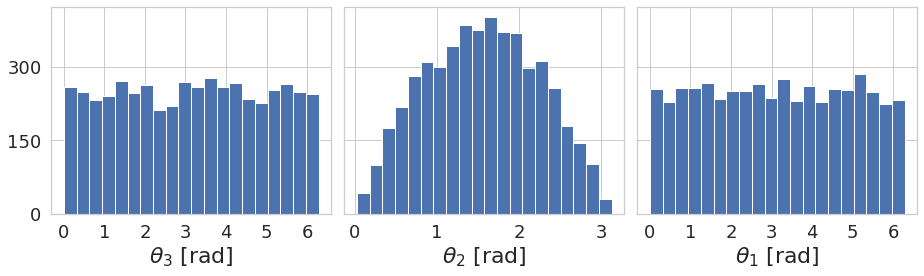

In [18]:
fig, axs = plt.subplots(1, 3, figsize=(13, 4), sharey=True)
#gs1 = gridspec.GridSpec(4, 13)
#gs1.update(wspace=0.025, hspace=0.05) 
#axs = list(map(lambda i: plt.subplot(gs1[i]), range(4)))
plt.axis('on')
#plt.title(r"Euler angles: $\mathbf{\theta} = (\theta_3, \theta_2, \theta_1)$", loc='center')
#angles_color = "darkseagreen"

axs[0].hist(angles_true[:,0]%(2*np.pi), bins=20)
axs[0].set_xlabel(r"$\theta_3$ [rad]", fontsize=label_size)
axs[1].hist(angles_true[:,1], bins=20)
axs[1].set_xlabel(r"$\theta_2$ [rad]", fontsize=label_size)
axs[2].hist(angles_true[:,2]%(2*np.pi), bins=20)
axs[2].set_xlabel(r"$\theta_1$ [rad]", fontsize=label_size)

#axs[0].set_xlim(0,1)
axs[0].yaxis.set_major_locator(plt.MaxNLocator(4))
axs[0].xaxis.set_major_locator(plt.MaxNLocator(steps=[1]))
axs[1].xaxis.set_major_locator(plt.MaxNLocator(steps=[1]))
axs[2].xaxis.set_major_locator(plt.MaxNLocator(steps=[1]))


axs[0].tick_params(axis='both', which='major', labelsize=tick_size)
axs[1].tick_params(axis='both', which='major', labelsize=tick_size)
axs[2].tick_params(axis='both', which='major', labelsize=tick_size)

plt.subplots_adjust(wspace=0.1)
plt.tight_layout()
plt.savefig("../pdfs/uniform_quaternions_ang.pdf", pad_inches=1)
plt.show();

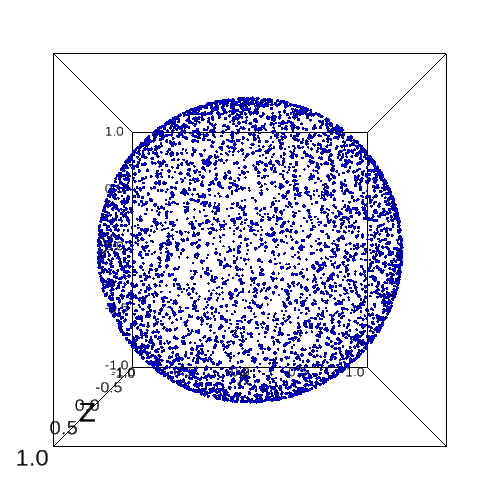

In [19]:
plot_detector_pixels(data['Angles'])

In [20]:
ipv.screenshot()

Output()

---

In [22]:
idx1 = list(np.random.choice(range(5000), size=10000))
idx2 = list(np.random.choice(range(5000), size=10000))

q1_true = euler2quaternion([angles_true[i] for i in idx1])
q2_true = euler2quaternion([angles_true[i] for i in idx2])

dQ = d_q(q1_true, q2_true).numpy()

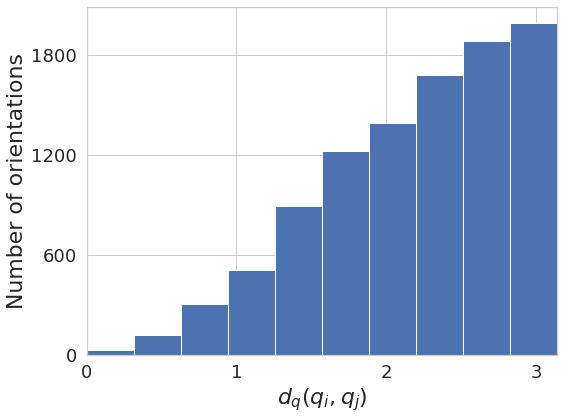

In [24]:
fig, ax = plt.subplots(figsize=(8,6));
ax.hist(dQ, bins=10);
ax.set_xlim(0, np.pi)
#ax.set_ylim(0, np.pi)
ax.set_xlabel("$d_q(q_i, q_j)$", fontsize=label_size)
ax.set_ylabel("Number of orientations", fontsize=label_size)
#ax.xaxis.set_major_locator(plt.MaxNLocator(4))
ax.yaxis.set_major_locator(plt.MaxNLocator(4))
ax.xaxis.set_major_locator(plt.MaxNLocator(steps=[1,2,3]))
plt.tick_params(axis='both', which='major', labelsize=tick_size)
plt.tight_layout()
plt.savefig("../pdfs/dQ_5j0n_uniform_quaternions.pdf", pad_inches=1)
plt.show();

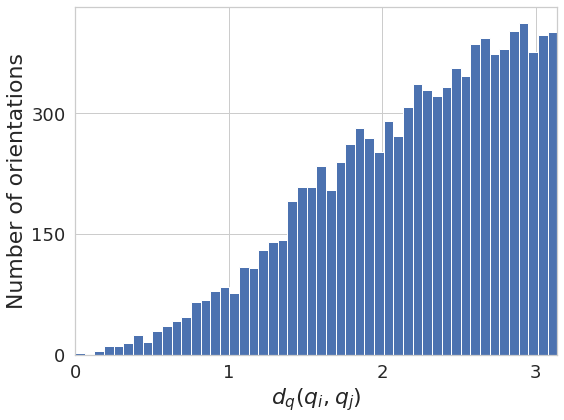

In [25]:
fig, ax = plt.subplots(figsize=(8,6));
ax.hist(dQ,bins=50);
ax.set_xlim(0, np.pi)
#ax.set_ylim(0, np.pi)
ax.set_xlabel("$d_q(q_i, q_j)$", fontsize=label_size)
ax.set_ylabel("Number of orientations", fontsize=label_size)
#ax.xaxis.set_major_locator(plt.MaxNLocator(4))
ax.yaxis.set_major_locator(plt.MaxNLocator(4))
ax.xaxis.set_major_locator(plt.MaxNLocator(steps=[1,2,3]))
plt.tick_params(axis='both', which='major', labelsize=tick_size)
plt.tight_layout()
plt.savefig("../pdfs/dQ_5j0n_uniform_quaternions.pdf", pad_inches=1)
plt.show();

In [26]:
np.savez('../../data/publication_plots_data/uniforms2_quaternions_angles_dQ', q_true.numpy(), np.array(angles_true), dQ)

---

---

## (2) Uniform Euler Angles Data Generation

In [28]:
input_file_path = "../../data/5j0n.mrc"
ProjNber = 5000
AngCoverage = [2.0, 1.0, 2.0]
AngShift = [0, 0, 0]
output_file_name = "5j0n_uniformEuler_ProjectionsAngles_ProjNber5000_AngCoverage2.0,1.0,2.0_AngShift0.0,0.0,0.0.h5"

generate_2D_projections(input_file_path=input_file_path, 
                        ProjNber=ProjNber,
                        AngCoverage=AngCoverage,
                        AngShift=AngShift,
                        angles_gen_mode="uniform_angles",
                        output_file_name=output_file_name)

* Generating the dataset *
(5000, 3)
Protein:         5j0n
Input filename:  ../../data/5j0n.mrc
Output filename: 5j0n_uniformEuler_ProjectionsAngles_ProjNber5000_AngCoverage2.0,1.0,2.0_AngShift0.0,0.0,0.0.h5
Volume:          (69, 57, 75)
Projections (#): (5000, 116, 116)
Angles (#):      (5000, 3)

**********


In [30]:
# location of *.h5 files
data_dir = "../../data/"

# half coverage (AngCoverage=0.5)
projections_filename = "5j0n_uniformEuler_ProjectionsAngles_ProjNber5000_AngCoverage2.0,1.0,2.0_AngShift0.0,0.0,0.0.h5"

# load structures
data = h5py.File(os.path.join(data_dir, projections_filename), 'r')

print(f"{data['Projections'].shape[0]} projections of images with dimension {data['Projections'].shape[1:]} pixels")
print(f"{data['Angles'].shape[0]} sets of {data['Angles'].shape[1]} ground truth angles of corresponding projection images")

5000 projections of images with dimension (116, 116) pixels
5000 sets of 3 ground truth angles of corresponding projection images


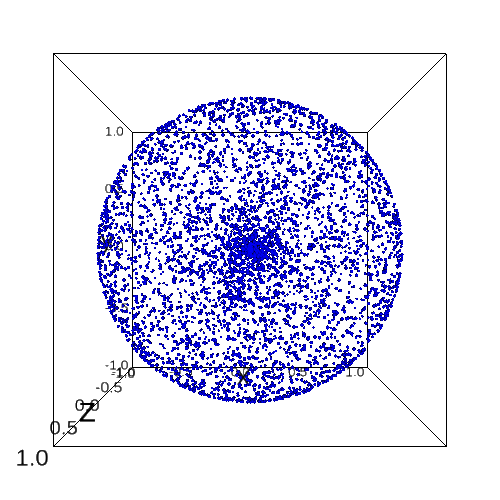

In [31]:
plot_detector_pixels(data['Angles'])

In [32]:
ipv.screenshot()

Output()

In [34]:
angles_true = data['Angles']
q_true = euler2quaternion(angles_true)

In [35]:
q_true.shape

TensorShape([5000, 4])

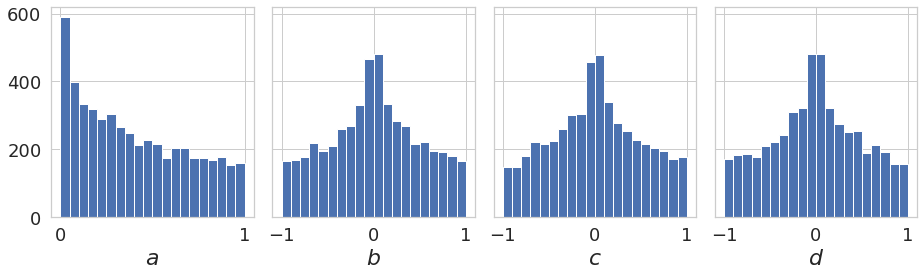

In [37]:
fig, axs = plt.subplots(1, 4, figsize=(13, 4), sharey=True)
#quaternion_color = "lightcoral"
#gs1 = gridspec.GridSpec(4, 13)
#gs1.update(wspace=0.025, hspace=0.05) 
#axs = list(map(lambda i: plt.subplot(gs1[i]), range(4)))
plt.axis('on')
#plt.title("Quaternion: $q = a + b\mathbf{i} + c\mathbf{j} + d\mathbf{k}$", loc='center', fontsize=label_size)

axs[0].hist(q_true[:,3], bins=20)
axs[0].set_xlabel("$a$", fontsize=label_size)
axs[1].hist(q_true[:,0], bins=20)
axs[1].set_xlabel("$b$", fontsize=label_size)
axs[2].hist(q_true[:,1], bins=20)
axs[2].set_xlabel("$c$", fontsize=label_size)
axs[3].hist(q_true[:,2], bins=20)
axs[3].set_xlabel("$d$", fontsize=label_size)

#axs[0].set_xlim(0,1)
axs[0].yaxis.set_major_locator(plt.MaxNLocator(4))
axs[0].xaxis.set_major_locator(plt.MaxNLocator(steps=[1]))
axs[1].xaxis.set_major_locator(plt.MaxNLocator(steps=[1]))
axs[2].xaxis.set_major_locator(plt.MaxNLocator(steps=[1]))
axs[3].xaxis.set_major_locator(plt.MaxNLocator(steps=[1]))

axs[0].tick_params(axis='both', which='major', labelsize=tick_size)
axs[1].tick_params(axis='both', which='major', labelsize=tick_size)
axs[2].tick_params(axis='both', which='major', labelsize=tick_size)
axs[3].tick_params(axis='both', which='major', labelsize=tick_size)

plt.subplots_adjust(wspace=0.1)
plt.tight_layout()
plt.savefig("../pdfs/uniform_angles_q.pdf", pad_inches=1)
plt.show();

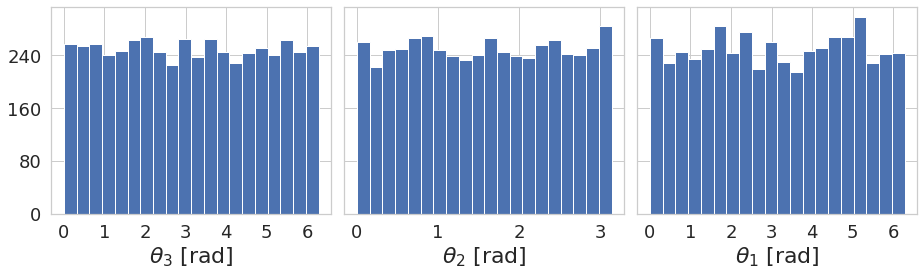

In [38]:
fig, axs = plt.subplots(1, 3, figsize=(13, 4), sharey=True)
#gs1 = gridspec.GridSpec(4, 13)
#gs1.update(wspace=0.025, hspace=0.05) 
#axs = list(map(lambda i: plt.subplot(gs1[i]), range(4)))
plt.axis('on')
#plt.title(r"Euler angles: $\mathbf{\theta} = (\theta_3, \theta_2, \theta_1)$", loc='center')
#angles_color = "darkseagreen"

axs[0].hist(angles_true[:,0]%(2*np.pi), bins=20)
axs[0].set_xlabel(r"$\theta_3$ [rad]", fontsize=label_size)
axs[1].hist(angles_true[:,1], bins=20)
axs[1].set_xlabel(r"$\theta_2$ [rad]", fontsize=label_size)
axs[2].hist(angles_true[:,2]%(2*np.pi), bins=20)
axs[2].set_xlabel(r"$\theta_1$ [rad]", fontsize=label_size)

#axs[0].set_xlim(0,1)
axs[0].yaxis.set_major_locator(plt.MaxNLocator(4))
axs[0].xaxis.set_major_locator(plt.MaxNLocator(steps=[1]))
axs[1].xaxis.set_major_locator(plt.MaxNLocator(steps=[1]))
axs[2].xaxis.set_major_locator(plt.MaxNLocator(steps=[1]))


axs[0].tick_params(axis='both', which='major', labelsize=tick_size)
axs[1].tick_params(axis='both', which='major', labelsize=tick_size)
axs[2].tick_params(axis='both', which='major', labelsize=tick_size)

plt.subplots_adjust(wspace=0.1)
plt.tight_layout()
plt.savefig("../pdfs/uniform_angles_ang.pdf", pad_inches=1)
plt.show();

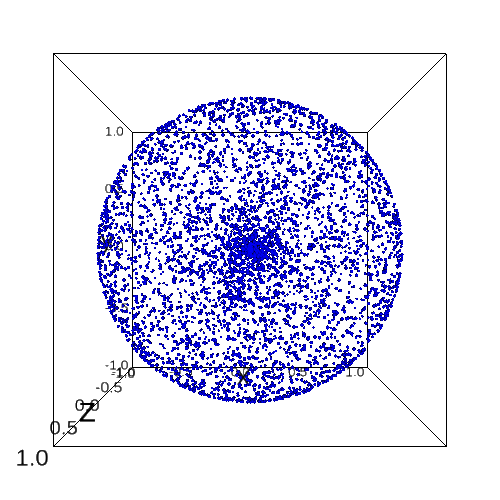

In [39]:
plot_detector_pixels(data['Angles'])

In [40]:
ipv.screenshot()

Output()

---

In [42]:
idx1 = list(np.random.choice(range(5000), size=10000))
idx2 = list(np.random.choice(range(5000), size=10000))

q1_true = euler2quaternion([angles_true[i] for i in idx1])
q2_true = euler2quaternion([angles_true[i] for i in idx2])

dQ = d_q(q1_true, q2_true).numpy()

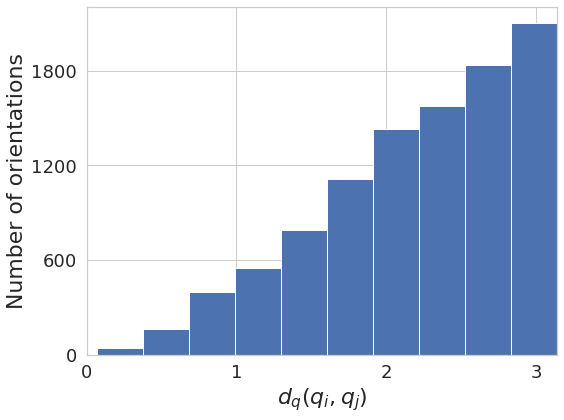

In [43]:
fig, ax = plt.subplots(figsize=(8,6));
ax.hist(dQ,bins=10);
ax.set_xlim(0, np.pi)
#ax.set_ylim(0, np.pi)
ax.set_xlabel("$d_q(q_i, q_j)$", fontsize=label_size)
ax.set_ylabel("Number of orientations", fontsize=label_size)
#ax.xaxis.set_major_locator(plt.MaxNLocator(4))
ax.yaxis.set_major_locator(plt.MaxNLocator(4))
ax.xaxis.set_major_locator(plt.MaxNLocator(steps=[1,2,3]))
plt.tick_params(axis='both', which='major', labelsize=tick_size)
plt.tight_layout()
plt.savefig("../pdfs/dQ_5j0n_uniform_angles.pdf", pad_inches=1)
plt.show();

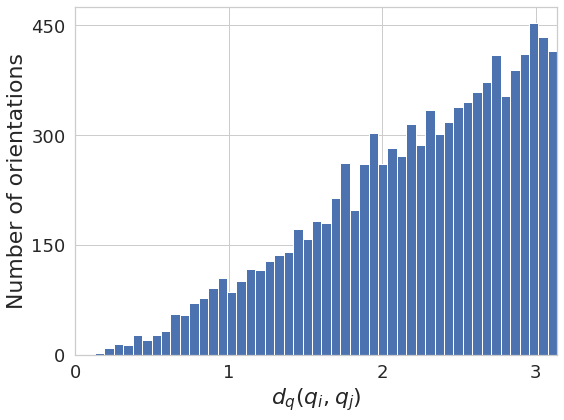

In [44]:
fig, ax = plt.subplots(figsize=(8,6));
ax.hist(dQ,bins=50);
ax.set_xlim(0, np.pi)
#ax.set_ylim(0, np.pi)
ax.set_xlabel("$d_q(q_i, q_j)$", fontsize=label_size)
ax.set_ylabel("Number of orientations", fontsize=label_size)
#ax.xaxis.set_major_locator(plt.MaxNLocator(4))
ax.yaxis.set_major_locator(plt.MaxNLocator(4))
ax.xaxis.set_major_locator(plt.MaxNLocator(steps=[1,2,3]))
plt.tick_params(axis='both', which='major', labelsize=tick_size)
plt.tight_layout()
plt.savefig("../pdfs/dQ_5j0n_uniform_angles.pdf", pad_inches=1)
plt.show();

In [45]:
np.savez('../../data/publication_plots_data/uniformEuler_quaternions_angles_dQ', q_true.numpy(), np.array(angles_true), dQ)

---